Success: Dataset imported successfully.


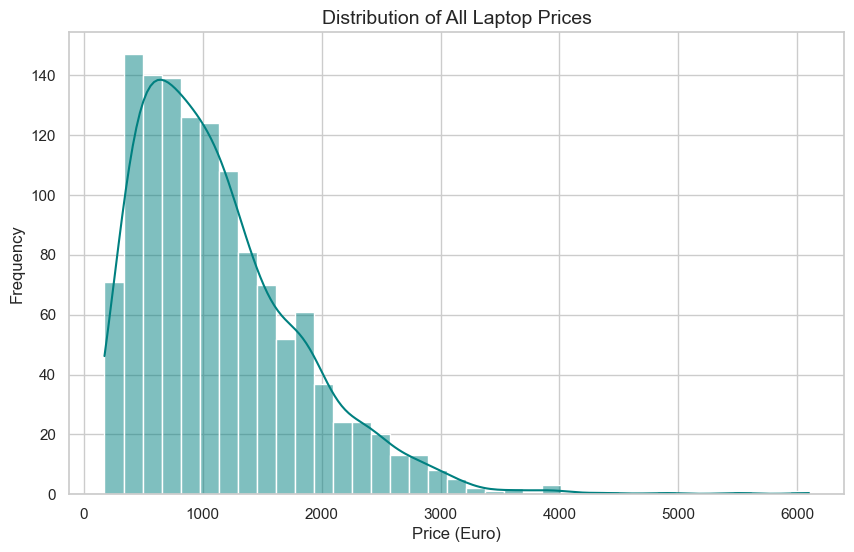


--- Average Laptop Price per Company ---
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptops on average is: Razer

Unique OS before cleaning: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


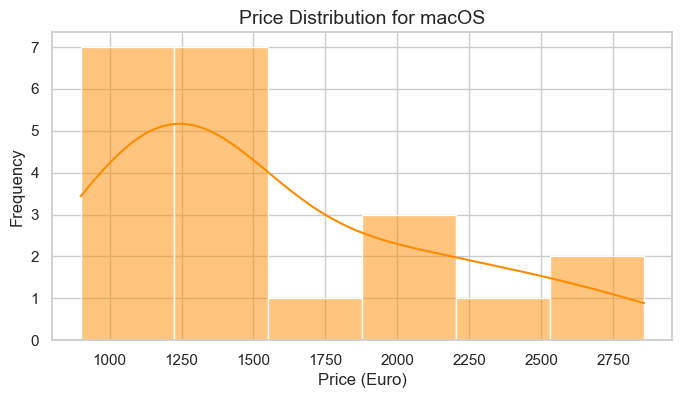

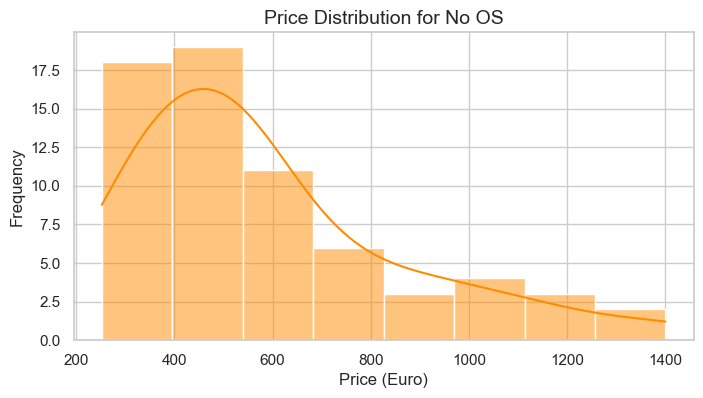

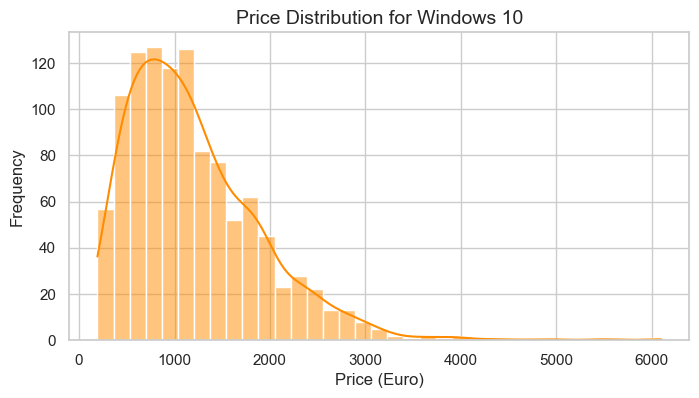

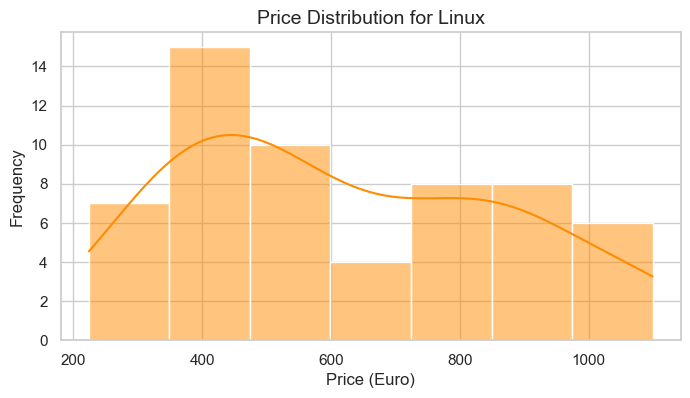

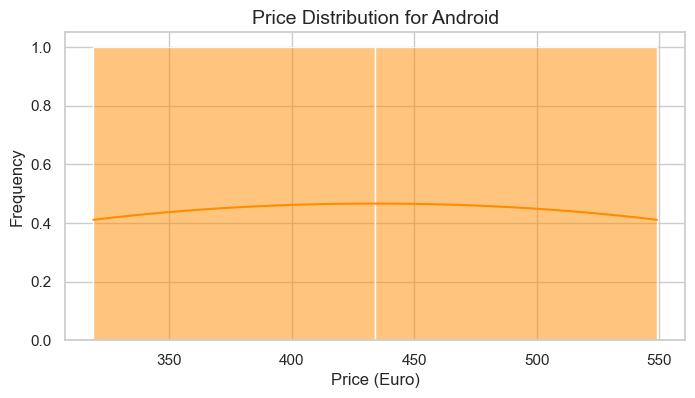

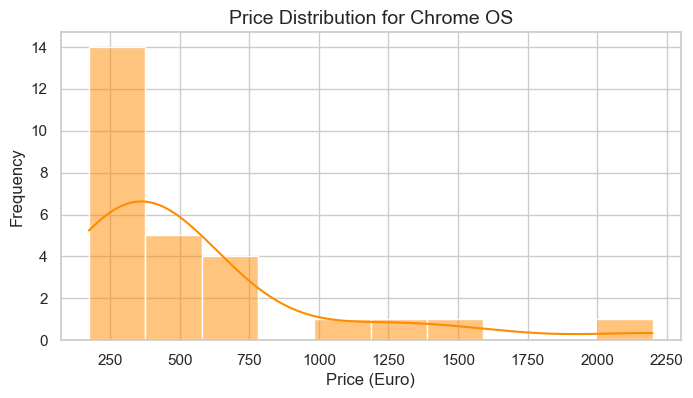

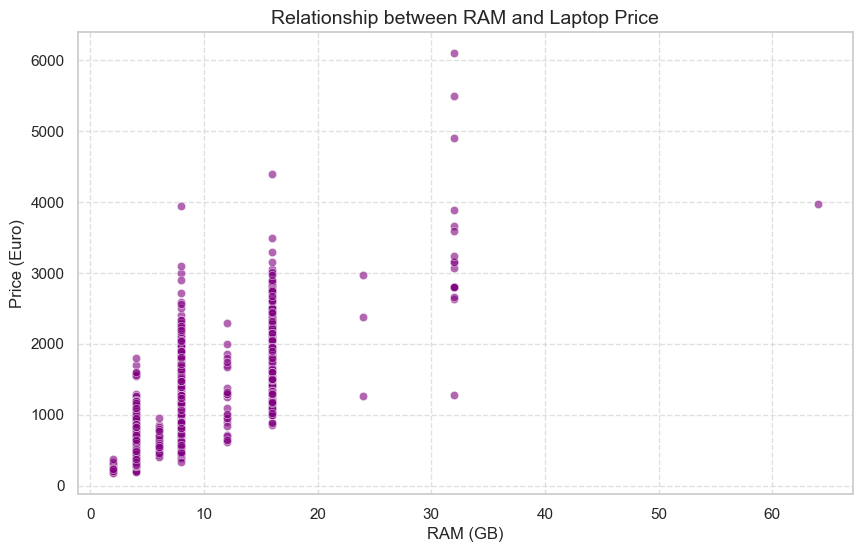

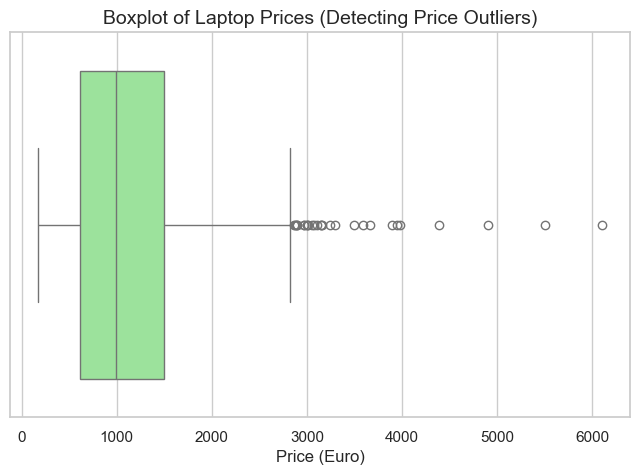


--- Storage Type Extraction (First 5 Rows) ---
                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage      Storage
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Set visual style
sns.set_theme(style="whitegrid")

# ---------------------------------------------------------
#  Data Import
# ---------------------------------------------------------
# Loading the dataset from the filesystem
# Ensure the file 'laptop_price - dataset.csv' is in the same directory
file_path = 'laptop_price - dataset.csv'

try:
    df = pd.read_csv(file_path, encoding='latin-1')
    print("Success: Dataset imported successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    # You might want to provide a full path if running locally
    # df = pd.read_csv(r'C:\path\to\your\file\laptop_price - dataset.csv')

# ---------------------------------------------------------
#  Initial Plotting & Statistics
# ---------------------------------------------------------
# 1. Plot the price of all the laptops
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], kde=True, color='teal')
plt.title('Distribution of All Laptop Prices', fontsize=14)
plt.xlabel('Price (Euro)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Average price analysis
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
most_expensive_company = avg_price_per_company.idxmax()
print("\n--- Average Laptop Price per Company ---")
print(avg_price_per_company)
print(f"\nThe company with the most expensive laptops on average is: {most_expensive_company}")

# ---------------------------------------------------------
#  Operating Systems Cleaning & Analysis
# ---------------------------------------------------------
# 3. Find and fix Operating System names to be uniform
print("\nUnique OS before cleaning:", df['OpSys'].unique())
# Mapping different names to a uniform format
os_mapping = {
    'Mac OS X': 'macOS',
    'Windows 10 S': 'Windows 10',
    'Windows 7': 'Windows 10'
}
df['OpSys_Cleaned'] = df['OpSys'].replace(os_mapping)
unique_systems = df['OpSys_Cleaned'].unique()
# 4. Plot distribution of prices for EACH operating system
# This creates a separate plot for each unique OS type
for system in unique_systems:
    plt.figure(figsize=(8, 4))
    subset = df[df['OpSys_Cleaned'] == system]
    sns.histplot(subset['Price (Euro)'], kde=True, color='darkorange')
    plt.title(f'Price Distribution for {system}', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

# ---------------------------------------------------------
# Relationship between RAM and Price
# ---------------------------------------------------------
# 5. Relationship between RAM (GB) and Price (Euro)
# In this dataset, 'RAM (GB)' is numeric, so no text cleaning is needed.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', alpha=0.6, color='purple')
plt.title('Relationship between RAM and Laptop Price', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
"""
--- Outlier Detection Discussion ---
1. What would be considered an outlier? 
   An outlier in this context is a laptop whose price is significantly higher or lower 
   than expected given its RAM. For example, a laptop with 4GB RAM costing 4000 Euro, 
   or a 64GB RAM laptop costing only 300 Euro.

2. How to detect it?
   - Visually: Using a Boxplot (as shown below) or the Scatterplot above.
   - Mathematically: Using the Interquartile Range (IQR) method. 
     Any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is a statistical outlier.
"""

# Visual outlier check using a boxplot for Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price (Euro)'], color='lightgreen')
plt.title('Boxplot of Laptop Prices (Detecting Price Outliers)', fontsize=14)
plt.xlabel('Price (Euro)')
plt.show()

# ---------------------------------------------------------
#  Feature Engineering - Storage Type
# ---------------------------------------------------------
# 6. Create "Storage type" column from "Memory"
# We split the string and take the word that describes the type (e.g., SSD, HDD)
# This lambda function handles simple cases and combined storage (taking the last type mentioned)
df['Storage type'] = df['Memory'].apply(lambda x: x.split()[-1])

print("\n--- Storage Type Extraction (First 5 Rows) ---")
print(df[['Memory', 'Storage type']].head())
